# 构造数据集
## 相差处理
处理各个初始文件，3900为一组，后一组减去前一组。
首先明确各个文件名

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir('data2000')
files

['hand-data-2019-12-08-19-44-33.txt',
 'hand-data-2019-12-08-19-58-45.txt',
 'foot-data-2019-12-08-19-36-03.txt',
 'stick-data-2019-12-08-19-47-49.txt',
 'stick-data-2019-12-08-19-45-44.txt',
 'foot-data-2019-12-08-20-02-28.txt',
 'stick-data-2019-12-08-20-06-46.txt',
 'hand-data-2019-12-08-19-57-31.txt',
 'foot-data-2019-12-08-20-05-39.txt',
 'foot-data-2019-12-08-19-37-11.txt',
 'foot-data-2019-12-08-20-04-36.txt',
 'stick-data-2019-12-08-20-08-47.txt',
 'hand-data-2019-12-08-20-01-10.txt',
 'stick-data-2019-12-08-20-07-45.txt',
 'hand-data-2019-12-08-19-42-17.txt',
 'hand-data-2019-12-08-19-43-25.txt',
 'foot-data-2019-12-08-19-23-49.txt',
 'stick-data-2019-12-08-19-48-56.txt',
 'foot-data-2019-12-08-19-38-42.txt',
 'foot-data-2019-12-08-20-03-31.txt',
 'stick-data-2019-12-08-19-46-41.txt',
 'hand-data-2019-12-08-19-41-17.txt',
 'stick-data-2019-12-08-20-09-52.txt',
 'hand-data-2019-12-08-20-00-07.txt']

In [2]:
def loadData(data):
    '''
    相差法处理原始数据,得到有效数据
    '''
    data = np.array(data)
    valid_data = []
    interval = 3750
    for i in range(0,len(data)-interval,interval):
        temp = [x for x in map(abs, data[i+interval:i+interval*2]-data[i:i+interval])]
        valid_data.append(temp)
    print('共{}组数据，每组数据有{}个点'.format(len(valid_data),len(valid_data[0])))
    return valid_data

In [21]:
# 处理脚踏数据
data = []
for i in files:
    if 'foot' in i:
        with open(os.path.join('data2000',i),'r') as f:
            for line in f:
                data.append(int(line.strip()))
            print('{} is finished.'.format(i))

foot-data-2019-12-08-19-36-03.txt is finished.
foot-data-2019-12-08-20-02-28.txt is finished.
foot-data-2019-12-08-20-05-39.txt is finished.
foot-data-2019-12-08-19-37-11.txt is finished.
foot-data-2019-12-08-20-04-36.txt is finished.
foot-data-2019-12-08-19-23-49.txt is finished.
foot-data-2019-12-08-19-38-42.txt is finished.
foot-data-2019-12-08-20-03-31.txt is finished.


In [36]:
foot_data = loadData(data)    
# 保存脚踏数据
with open('foot_data.txt','w') as f:
    for line in foot_data:
        f.write(str(line)+'\n')

共1999组数据，每组数据有3750个点


In [42]:
# 处理手触数据
data = []
for i in files:
    if 'hand' in i:
        with open(os.path.join('data2000',i),'r') as f:
            for line in f:
                data.append(int(line.strip()))
            print('{} is finished.'.format(i))

hand_data = loadData(data)
# 保存手触数据
with open('hand_data.txt','w') as f:
    for line in hand_data:
        f.write(str(line)+'\n')

hand-data-2019-12-08-19-44-33.txt is finished.
hand-data-2019-12-08-19-58-45.txt is finished.
hand-data-2019-12-08-19-57-31.txt is finished.
hand-data-2019-12-08-20-01-10.txt is finished.
hand-data-2019-12-08-19-42-17.txt is finished.
hand-data-2019-12-08-19-43-25.txt is finished.
hand-data-2019-12-08-19-41-17.txt is finished.
hand-data-2019-12-08-20-00-07.txt is finished.
共1999组数据，每组数据有3750个点


In [43]:
# 处理棒击数据
data = []
for i in files:
    if 'stick' in i:
        with open(os.path.join('data2000',i),'r') as f:
            for line in f:
                data.append(int(line.strip()))
            print('{} is finished.'.format(i))

stick_data = loadData(data)
# 保存手触数据
with open('stick_data.txt','w') as f:
    for line in stick_data:
        f.write(str(line)+'\n')

stick-data-2019-12-08-19-47-49.txt is finished.
stick-data-2019-12-08-19-45-44.txt is finished.
stick-data-2019-12-08-20-06-46.txt is finished.
stick-data-2019-12-08-20-08-47.txt is finished.
stick-data-2019-12-08-20-07-45.txt is finished.
stick-data-2019-12-08-19-48-56.txt is finished.
stick-data-2019-12-08-19-46-41.txt is finished.
stick-data-2019-12-08-20-09-52.txt is finished.
共1999组数据，每组数据有3750个点


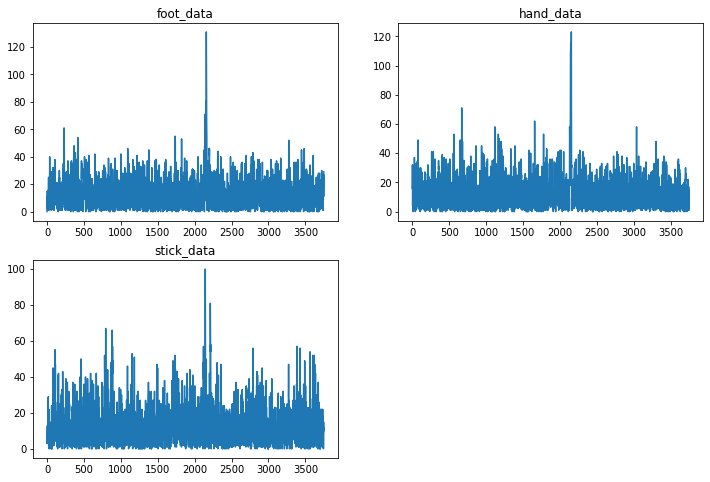

In [45]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('foot_data')
plt.plot(foot_data[-1])
plt.subplot(222)
plt.title('hand_data')
plt.plot(hand_data[-1])
plt.subplot(223)
plt.title('stick_data')
plt.plot(stick_data[-1])
# plt.subplot(224)
# plt.title('normal_data')
# plt.plot(normal_data[11])
plt.show()

## 划分数据集
每类数据共499个，则训练数据417个，验证数据41个，测试数据41个。\
建立`train.txt`, `train_label.txt`, `val.txt`, `val_label.txt`, `test.txt`, `test_label.txt`。
1. 依次取出四种数据，打乱内部顺序
2. 取前417个放入`train_data`，接着41个放入`val_data`，最后41个放入`test_data`。
3. 构造依次417个foot，hand，stick，normal的`train_label`，同样的还有`val_label`,`test_label`
4. 利用`sklearn.utils.shuffle()`函数同步打乱data与其label并放入各自文件夹

In [3]:
from sklearn.utils import shuffle

In [4]:
def handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label):
    '''
    拿出数据，打乱，存放
    '''
    data = shuffle(data)
    for i in range(1665):
        train_data.append(data[i])
    for i in range(1665,1665+167):
        val_data.append(data[i])
    for i in range(1665+167,1999):
        test_data.append(data[i])
        
    # 将label编码为整数，foot-1，hand-2,stick-3
    if name == 'foot': name = 0
    elif name == 'hand': name = 1
    else: name = 2
    for i in range(1665):
        train_label.append(name)
    for i in range(167):
        val_label.append(name)
        test_label.append(name)
    return train_data,val_data,test_data,train_label,val_label,test_label

In [5]:
file_name = ['foot','hand','stick']
train_data,val_data,test_data,train_label,val_label,test_label = [],[],[],[],[],[]
for name in file_name:
    data = []
    with open(name+'_data.txt','r') as f:
        for line in f:
            data.append(line.strip('[]\n'))
    handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label)
    print('当前有{}条训练数据，{}条验证数据，{}条测试数据'.format(len(train_data),len(val_data),len(test_data)))
    print('当前有{}个训练标签，{}个验证标签，{}个测试标签'.format(len(train_label),len(val_label),len(test_label)))#

当前有1665条训练数据，167条验证数据，167条测试数据
当前有1665个训练标签，167个验证标签，167个测试标签
当前有3330条训练数据，334条验证数据，334条测试数据
当前有3330个训练标签，334个验证标签，334个测试标签
当前有4995条训练数据，501条验证数据，501条测试数据
当前有4995个训练标签，501个验证标签，501个测试标签


In [6]:
# 成对打乱数据
train_data, train_label = shuffle(train_data, train_label)
val_data, val_label = shuffle(val_data, val_label)
test_data, test_label = shuffle(test_data, test_label)
# 写入文件
with open('train_data.txt','w') as f:
    for line in train_data:
        f.write(line+'\n')
with open('val_data.txt','w') as f:
    for line in val_data:
        f.write(line+'\n')
with open('test_data.txt','w') as f:
    for line in test_data:
        f.write(line+'\n')
with open('train_label.txt','w') as f:
    for line in train_label:
        f.write(str(line)+'\n')
with open('val_label.txt','w') as f:
    for line in val_label:
        f.write(str(line)+'\n')
with open('test_label.txt','w') as f:
    for line in test_label:
        f.write(str(line)+'\n')